In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib

In [22]:
os.chdir("/content/drive/MyDrive/2024-2/2024-2 인간 뇌이미징의 데이터사이언스/공유_뇌데사_기말/asdf/final_data")
#data

fmri_train = pd.read_csv('./train/fmri_train.csv')
fmri_test = pd.read_csv('./test/fmri_test.csv')

smri_train = pd.read_csv('./train/smri_train.csv')
smri_test = pd.read_csv('./test/smri_test.csv')

wm_train = pd.read_csv('./train/wm_train.csv')
wm_test = pd.read_csv('./test/wm_test.csv')

demo_train = pd.read_csv('./train/demo_train.csv')
demo_test = pd.read_csv('./test/demo_test.csv')

cbcl_train = pd.read_csv('./train/cbcl_train.csv')
cbcl_test = pd.read_csv('./test/cbcl_test.csv')

poly_train = pd.read_csv('./train/poly_train.csv')
poly_test = pd.read_csv('./test/poly_test.csv')

In [23]:
fmri_test.shape

(40, 36)

In [24]:
#merge
def merge(df_list):
    base = df_list[0]

    for df in df_list[1:]:
        if 'HCvsSI' in df.columns:
            base = base.merge(df.drop(columns=["HCvsSI"]), on = 'subjectkey', how = 'inner')
        else :
            base = base.merge(df, on = 'subjectkey', how = 'inner')

    return base


##base 조합
train_df = [demo_train, cbcl_train, poly_train, fmri_train, smri_train, wm_train]
test_df = [demo_test, cbcl_test, poly_test, fmri_test, smri_test, wm_test]

all_train = merge(train_df)
all_test = merge(test_df)

all_train.to_csv('./train/train.csv', index = False)
all_test.to_csv('./test/test.csv', index= False)

In [25]:
all_train.shape

(200, 232)


Training Data Evaluation Metrics:
Accuracy: 0.9750
Precision: 0.9897
Recall: 0.9600
F1 Score: 0.9746

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.99      0.96      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Training Data AUC: 0.9942


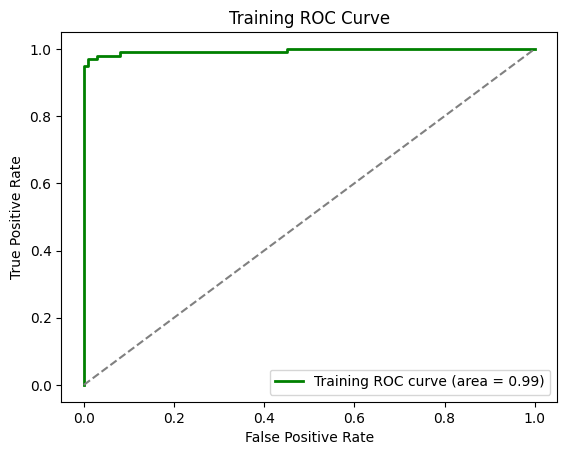

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 데이터셋 준비
# merged_train과 merged_test에서 X (features)와 y (target) 분리
X_train = all_train.drop(columns=['HCvsSI', 'subjectkey'])  # 'HCvsSI' 열을 예측 변수로 가정
y_train = all_train['HCvsSI']
X_test = all_test.drop(columns=['HCvsSI', 'subjectkey'])
y_test = all_test['HCvsSI']

model = RandomForestClassifier(random_state=42, bootstrap = True, max_depth = 5, max_features = 'log2', min_samples_leaf = 2,
                                 min_samples_split = 20, n_estimators = 100)
model.fit(X_train, y_train)

# training data에 대한 평가 지표 계산
# Training data 예측
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]  # 양성 클래스 확률

# Training data에 대한 평가 지표 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Data Evaluation Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

# 상세 성능 보고서 출력
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# Training data에 대한 ROC Curve 계산
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_proba)
train_roc_auc = auc(train_fpr, train_tpr)
print(f"Training Data AUC: {train_roc_auc:.4f}")

# Training ROC Curve 시각화
plt.figure()
plt.plot(train_fpr, train_tpr, color='green', lw=2, label=f'Training ROC curve (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve')
plt.legend(loc="lower right")
plt.show()

Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9444
Recall: 0.8500
F1 Score: 0.8947

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

AUC: 0.9425


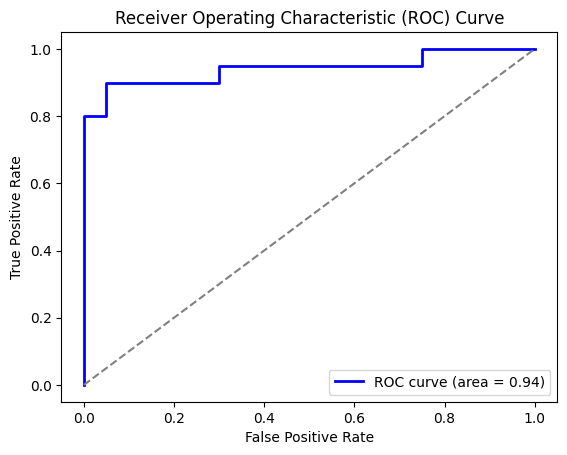

In [27]:
# 예측
y_pred = model.predict(X_test)
y_pred_binary = y_pred
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 양성 클래스의 확률

# test data에 대한 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 상세 성능 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# ROC Curve 시각화
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SHAP를 이용한 변수 기여도 분석 코드

ChatGPT 왈, "XGBoost 모델에서 어떤 변수가 0으로 예측되는 데 기여하고, 어떤 변수가 1로 예측되는 데 기여하는지를 확인하려면, 각 예측값에 대한 SHAP(SHapley Additive exPlanations) 값을 활용할 수 있습니다. SHAP는 각 특성이 개별 예측값에 얼마나 기여했는지를 설명할 수 있는 방법론으로, 모델의 해석 가능성을 높이는 데 유용합니다.

아래는 SHAP 값을 계산하고 시각화하여 이를 확인하는 방법을 보여주는 코드입니다."

SHAP Summary Plot:


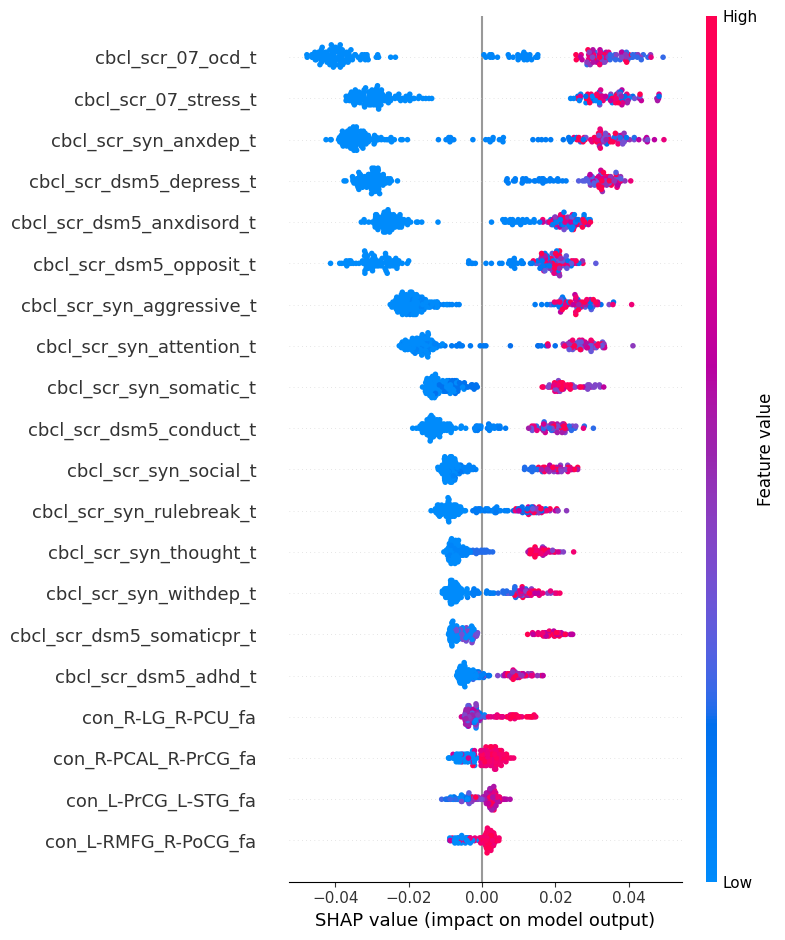

SHAP Bar Plot:


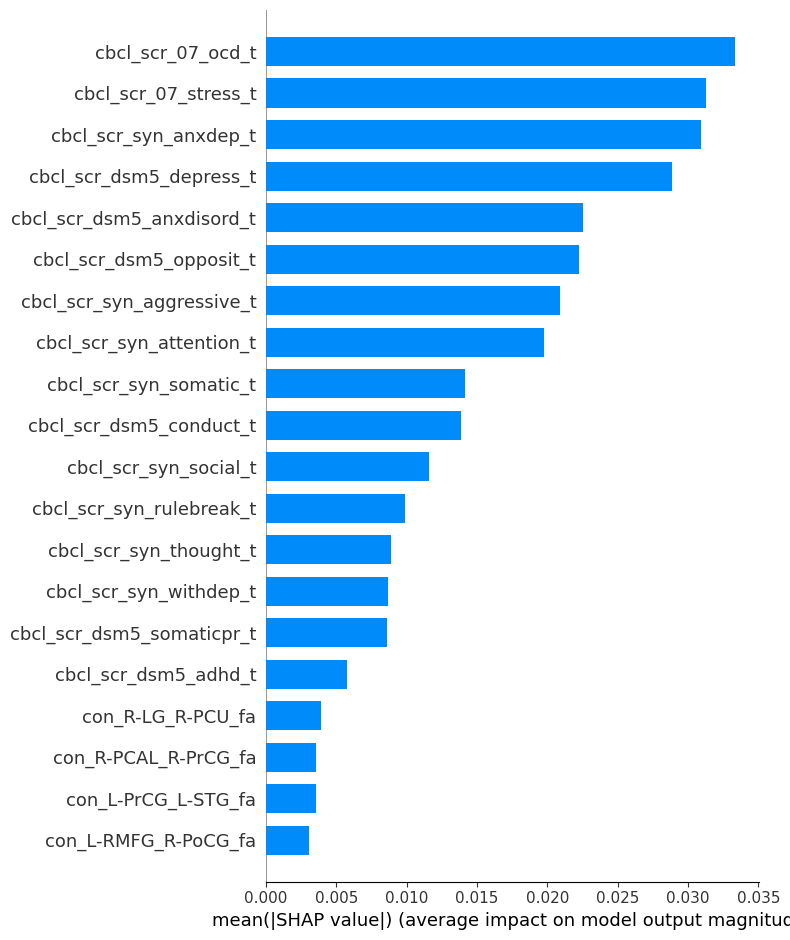

In [28]:
# SHAP 값 계산
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_train, check_additivity=False)

# SHAP 값 요약 플롯 (전체 데이터)
print("SHAP Summary Plot:")
shap.summary_plot(shap_values[:,:,1], X_train)

# SHAP 값 요약 바 플롯
print("SHAP Bar Plot:")
shap.summary_plot(shap_values[:,:,1], X_train, plot_type="bar")

In [ ]:
# SHAP 값을 데이터프레임으로 변환
shap_table = pd.DataFrame(shap_values[:,:,1], columns=X_train.columns)

shap_table['true_label'] = y_train.reset_index(drop=True)  # 실제 라벨 추가

shap_table

shap_rank = shap_table.drop("true_label", axis=1).abs().mean(axis=0).sort_values(ascending=False)


shap_rank.to_csv("./shap_rank.csv", index=True)

In [ ]:
top_20 = shap_rank.iloc[:20].index
top_20

In [ ]:
for feature in top_20:
    print(f"Generating SHAP dependence plot for feature: {feature}")
    shap.dependence_plot(feature, shap_values[:,:,1], X_train, interaction_index=None)

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

for feature_name in top_20:
  shap_values_feature = shap_values[:,:,1][:, X_train.columns.get_loc(feature_name)]
  feature_values = X_train[feature_name]

# 피어슨 상관계수 계산
  correlation = np.corrcoef(feature_values, shap_values_feature)[0, 1]
  print(f"{feature_name}: {correlation:.3f}")
